### MNIST with no neural network
The [MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/) consists of images that are 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total, each image representing a digit from zero through nine.
This is a multiclass classification task and, although ostensibly a computer vision exercise and often solved using neural networks, it can also be treated as simply a dataset consisting of 784 features.

Here we shall train the scikit-learn [HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html). Note that [all classifiers in scikit-learn do multiclass classification out-of-the-box](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification).

In [3]:
# !pip install xgboost

In [6]:
# ! pip install seaborn

In [7]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sample_submission.csv')


In [8]:

# Split training data into features and labels
X_train = train_data.iloc[:, 1:]
y_train = train_data['label']

In [10]:
X_train.shape

(42000, 784)

In [11]:
y_train.shape

(42000,)

In [12]:

# Split the training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Train the XGBoost classifier
clf = XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=10,               # Number of classes (digits 0-9)
    random_state=42,
    n_jobs=-1                   # Use all CPU cores
)
clf.fit(X_train_split, y_train_split)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1, num_class=10,
              num_parallel_tree=None, ...)

In [13]:
# Predict on the validation set
y_val_pred = clf.predict(X_val_split)

In [14]:
y_val_pred

array([8, 1, 9, ..., 3, 0, 9], shape=(8400,), dtype=int32)

Validation Accuracy: 0.9739
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.99      0.99       909
           2       0.97      0.97      0.97       846
           3       0.98      0.96      0.97       937
           4       0.97      0.97      0.97       839
           5       0.97      0.96      0.96       702
           6       0.97      0.99      0.98       785
           7       0.98      0.97      0.97       893
           8       0.97      0.98      0.97       835
           9       0.95      0.97      0.96       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



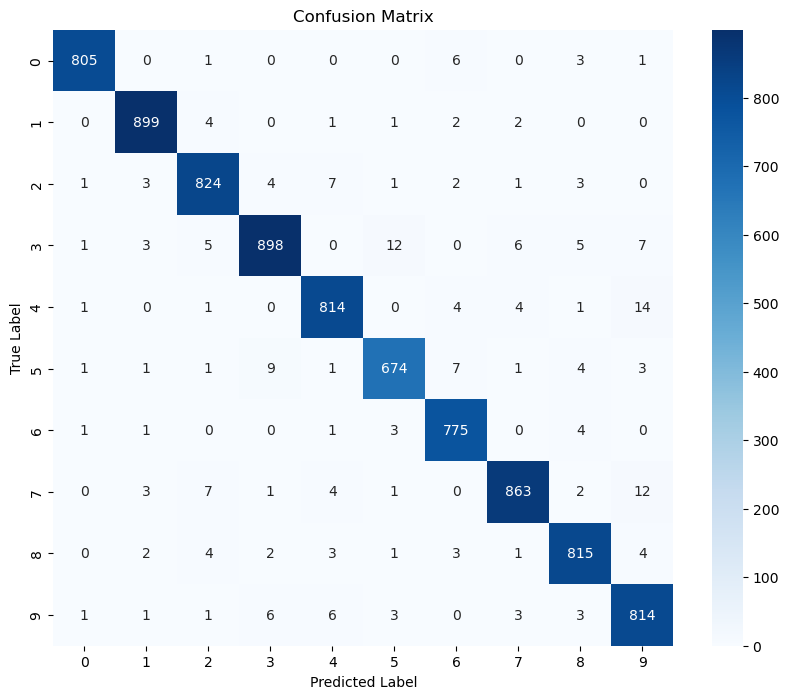

In [15]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, F1-score)
report = classification_report(y_val_split, y_val_pred, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_val_split, y_val_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

# Predict on test data and save submission file
predictions = clf.predict(test_data)
sample["Label"] = predictions